In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [248]:
def process_GTA(GTA, column_index):
    # Extract the specified column
    GTA1 = GTA[:, column_index]
    
    # Sort the extracted values
    GTA2 = np.sort(GTA1)
    
    # Initialize x array
    x = np.zeros(80)
    
    # Process each element in GTA2
    for value in GTA2:
        rr = int(np.floor(value))
        for j in range(rr + 1, 81):
            x[j - 1] += 1
    
    # Normalize x
    Inc2 = x / 10000 #number of simulations we ran in total
    
    return Inc2

In [226]:
rng = np.random.Generator(np.random.MT19937()) #using MT19937 64-bit floats
xran = rng.random()
iran = int(1e+6 * xran)
# rng.random(xran)
np.random.seed(iran)
print(xran)
R12=0.000107972 
R14=9.94617E-7  
R23=0.000127717  
R25=1.59139E-6 
R36=3.73976E-6  
R45= 0.000382222  
R56=0.000452117  
k1=1039.12 
k2=171.13 
gamma3=0.2
gamma4=0.07
gamma5=0.07
gamma6=1.012
d=0.05
Ncrypt = 1e+7

iruns = 0 
aspirin = False
xtime = 0.0

pathcount = 0
patharr = np.zeros(1000000, dtype=int)

results = []
paths = []

def ran0():
    return np.random.rand()

#Gillespie simulation loop
while True:
    iruns +=1
    if iruns >= 12000: #500000:
        break
    t = 0
    n1 = Ncrypt * np.exp(-(R12 + R14) * t)
    n2 = (Ncrypt * R12 * (np.exp(-(R23 + R25) * t) - np.exp(-(R12 + R14) * t))) / (R12 + R14 - R23 - R25)
    n3 = 0
    n4 = 0
    n5 = 0
    n6 = 0

    R12=0.000107972 
    R14=9.94617E-7  
    R23=0.000127717  
    R25=1.59139E-6 
    R36=3.73976E-6  
    R45= 0.000382222  
    R56=0.000452117  

    k1=1039.12 
    k2=171.13 

    gamma3=0.2
    gamma4=0.07
    gamma5=0.07
    gamma6=1.012
    d=0.05

    Ncrypt = 1e+7

    aspirin = False 
    xtime = 0.

    pathcount = 0
    patharr[:] = 0

    while True:
        # ASPIRIN
        if xtime >= 70 and not aspirin:
            aspirin = True
            gamma3 *= 0.5 #0.9 #high dose vs low dose proliferation rate
            gamma4 *= 0.5 #0.9
            gamma6 *= 0.5 #0.9
            d *= 2.0 #1.5
            R12 = 0.0000848292
            R14 = 9.31122e-7
            R23 = 0.000109836
            R25 = 1.36859e-6
            R36 = 3.21619e-6
            R45 = 0.000328711
            R56 = 0.000388821

        if xtime >= 80:
            R12 = 0.000107972
            R14 = 9.94617e-7
            R23 = 0.000127717
            R25 = 1.59139e-6
            R36 = 3.73976e-6
            R45 = 0.000382222
            R56 = 0.000452117
            gamma3 = 0.2
            gamma4 = 0.07
            gamma5 = 0.07
            gamma6 = 1.012
            d = 0.05
            Ncrypt = 1e7

        sss = n3 + n4 + n5

        g1 = abs(gamma3 * n3 * (1 - sss / k1))
        gg1 = gamma3 * n3 * (1 - sss / k1)
        g2 = d * n3
        g3 = R23 * n2
        g4 = R36 * n3

        g5 = abs(gamma4 * n4 * (1 - sss / k2))
        gg5 = gamma4 * n4 * (1 - sss / k2)
        g6 = d * n4
        g7 = R14 * n1
        g8 = R45 * n4

        g9 = abs(gamma5 * n5 * (1 - sss / k2))
        gg9 = gamma5 * n5 * (1 - sss / k2)
        g10 = d * n5
        g11 = R25 * n2
        g12 = R56 * n5

        g13 = gamma6 * n6
        g14 = d * n6

        ss = g1 + g2 + g3 + g4 + g5 + g6 + g7 + g8 + g9 + g10 + g11 + g12 + g13 + g14
        if ss == 0:
            break

        aa = g1 / ss
        bb = g2 / ss
        cc = g3 / ss
        dd = g4 / ss
        ee = g5 / ss
        ff = g6 / ss
        gg = g7 / ss
        hh = g8 / ss
        ii = g9 / ss
        jj = g10 / ss
        kk = g11 / ss
        ll = g12 / ss
        mm = g13 / ss
        nn = g14 / ss

        xran = ran0()

        if xran < aa:
            if gg1 > 0:
                n3 += 1
            elif gg1 < 0:
                n3 -= 1
        elif xran < aa + bb:
            n3 -= 1
        elif xran < aa + bb + cc:
            n3 += 1
        elif xran < aa + bb + cc + dd:
            n3 -= 1
            n6 += 1
            pathcount += 1
            patharr[pathcount] = 1
        elif xran < aa + bb + cc + dd + ee:
            if gg5 > 0:
                n4 += 1
            elif gg5 < 0:
                n4 -= 1
        elif xran < aa + bb + cc + dd + ee + ff:
            n4 -= 1
        elif xran < aa + bb + cc + dd + ee + ff + gg:
            n4 += 1
        elif xran < aa + bb + cc + dd + ee + ff + gg + hh:
            n4 -= 1
            n5 += 1
        elif xran < aa + bb + cc + dd + ee + ff + gg + hh + ii:
            if gg9 > 0:
                n5 += 1
            elif gg9 < 0:
                n5 -= 1
        elif xran < aa + bb + cc + dd + ee + ff + gg + hh + ii + jj:
            n5 -= 1
        elif xran < aa + bb + cc + dd + ee + ff + gg + hh + ii + jj + kk:
            n5 += 1
        elif xran < aa + bb + cc + dd + ee + ff + gg + hh + ii + jj + kk + ll:
            n5 -= 1
            n6 += 1
            pathcount += 1
            patharr[pathcount] = 0
        elif xran < aa + bb + cc + dd + ee + ff + gg + hh + ii + jj + kk + ll + mm:
            n6 += 1
        elif xran < aa + bb + cc + dd + ee + ff + gg + hh + ii + jj + kk + ll + mm + nn:
            n6 -= 1
        if n6 >= 100: #1e2:
            results.append([xtime, n1, n2, n3, n4, n5])
            paths.append(patharr[:pathcount].tolist())
            break

        if xtime >= 80 and n6 < 100:
#             results.append([-1.0, -1.0, -1.0, -1.0, -1.0, -1.0])
#             paths.append([-1])
            break

        xran = ran0()
        xtime += -np.log(xran) / ss

        t = xtime
        n1 = Ncrypt * np.exp(-(R12 + R14) * t)
        n2 = (Ncrypt * R12 * (np.exp(-(R23 + R25) * t) - np.exp(-(R12 + R14) * t))) / (R12 + R14 - R23 - R25)

0.005829957075878633
DONE


In [188]:
results_30_40 = np.array(results)
paths_30_40 = np.array(paths, dtype=object)

In [197]:
results_70_80 = np.array(results)
paths_70_80 = np.array(paths, dtype=object)

In [199]:
results_30_50 = np.array(results)
paths_30_50 = np.array(paths, dtype=object)

In [202]:
results_60_80 = np.array(results)
paths_60_80 = np.array(paths, dtype=object)

In [215]:
results_30_80 = np.array(results)
paths_30_80 = np.array(paths, dtype=object)

In [204]:
results_none = np.array(results)
paths_none = np.array(paths, dtype=object)

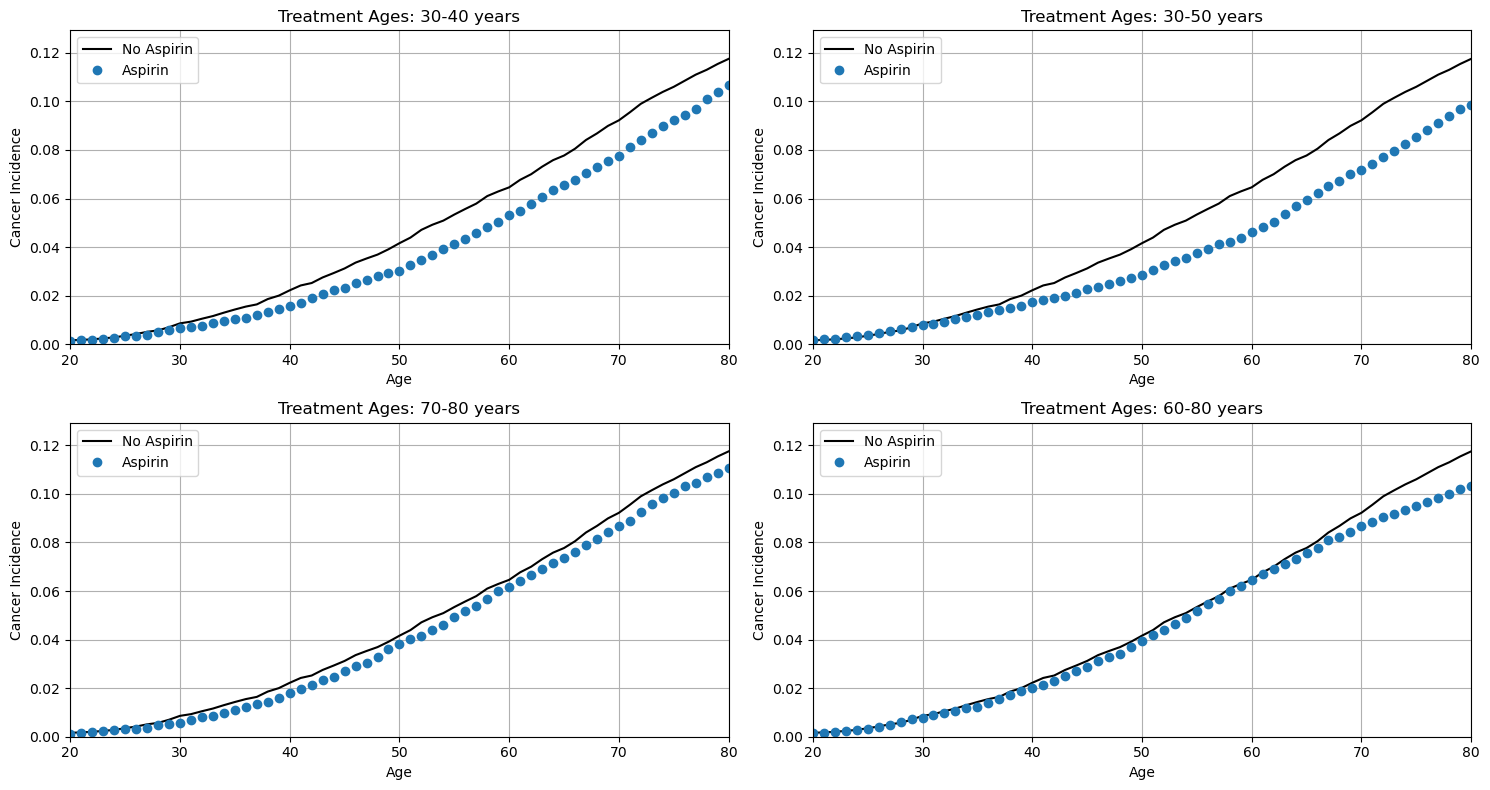

In [249]:
Inc0 = process_GTA(results_none, 0)
Inc1 = process_GTA(results_30_40, 0) 
Inc2 = process_GTA(results_30_50, 0) 
Inc3 = process_GTA(results_70_80, 0) 
Inc4 = process_GTA(results_60_80, 0)
Inc5 = process_GTA(results_30_80, 0)

plt.figure(figsize=(15, 8))
for j in range(1, 5):
    plt.subplot(2, 2, j)
    ls = ["30-40 years", "30-50 years", "70-80 years", "60-80 years"]
    # Plot Inc0
    plt.plot(range(1, 81), Inc0, color='black', label='No Aspirin')
    plt.plot(range(1, 81), [Inc1, Inc2, Inc3, Inc4][j - 1], marker='o', linestyle='', label='Aspirin')
    
    plt.xlim(20, 80)
    plt.ylim(0, max(Inc0.max(), [Inc1, Inc2, Inc3, Inc4][j - 1].max()) * 1.1)
    plt.xlabel('Age')
    plt.ylabel('Cancer Incidence')
    plt.title(f'Treatment Ages: {ls[j-1]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

#### High aspirin doses

In [217]:
high_30_40 = np.array(results)

In [219]:
high_30_50 = np.array(results)

In [227]:
high_70_80 = np.array(results)

In [223]:
high_60_80 = np.array(results)

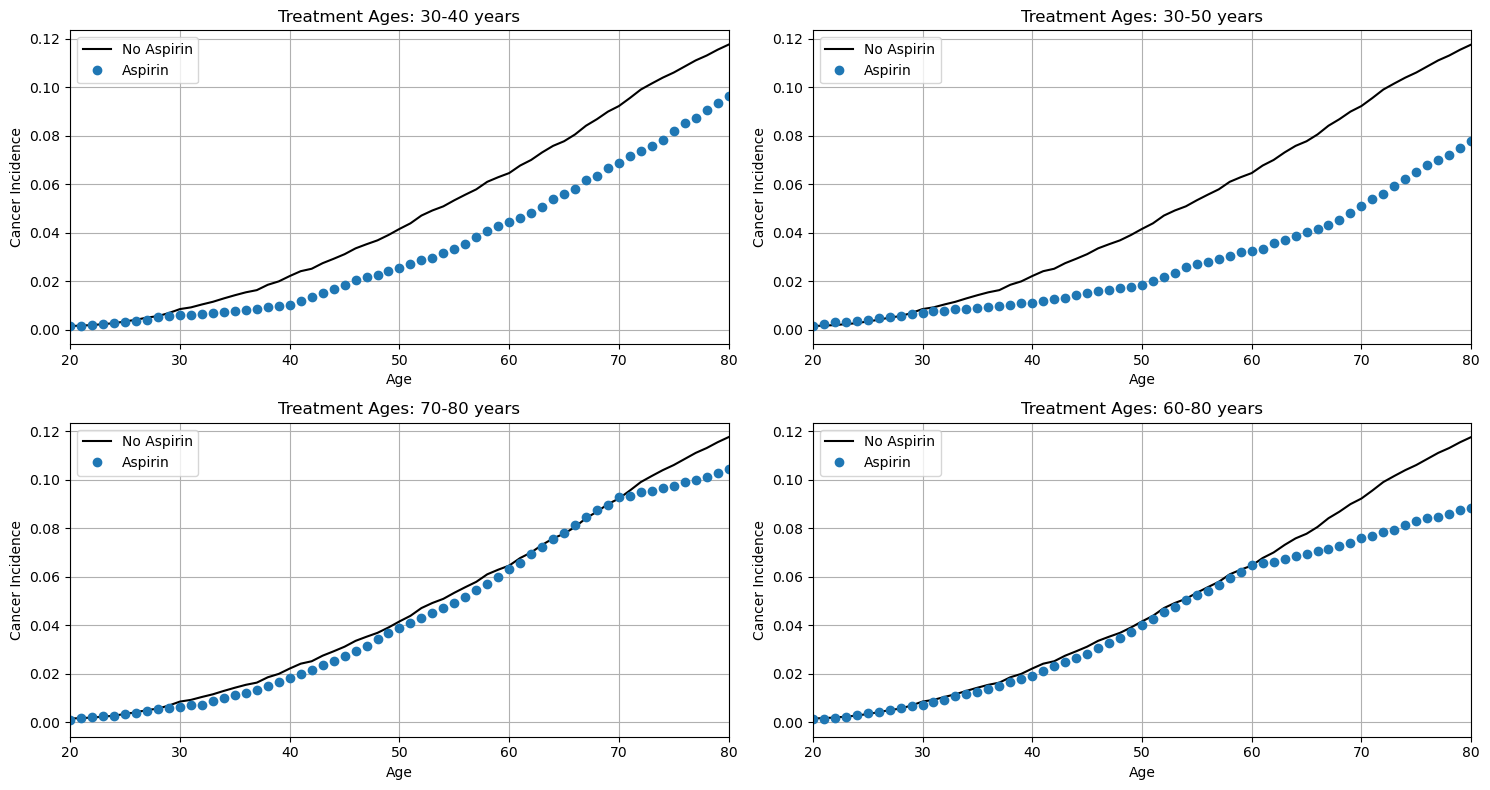

In [250]:
Inc6 = process_GTA(high_30_40, 0) 
Inc7 = process_GTA(high_30_50, 0) 
Inc8 = process_GTA(high_70_80, 0) 
Inc9 = process_GTA(high_60_80, 0)

plt.figure(figsize=(15, 8))
for j in range(1, 5):
    plt.subplot(2, 2, j)
    
    # Plot Inc0
    plt.plot(range(1, 81), Inc0, color='black', label='No Aspirin')
    
    # Plot I*Inc0 and Inc2[2*j - 1] with scaling for Inc1, Inc2, Inc3, Inc4
    #plt.plot(range(1, 81), 1 * Inc0, 'ro', label='I*Inc2[-1]')
    ls = ["30-40 years", "30-50 years", "70-80 years", "60-80 years"]
    plt.plot(range(1, 81), [Inc6, Inc7, Inc8, Inc9][j - 1], marker='o', linestyle='', label="Aspirin")
    
    plt.xlim(20, 80)
    #plt.ylim(0, max(Inc0.max(), [Inc6, Inc7, Inc8, Inc9][j - 1].max()) * 1.1)
    plt.xlabel('Age')
    plt.ylabel('Cancer Incidence')
    plt.title(f'Treatment Ages: {ls[j-1]}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()